In [1]:
import skfmm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scipy.io
import skimage as ski

In [2]:
Tp_data = []
Ts_data = []

vp = np.load('./mar_vp.npy')
vs = np.load('./mar_vs.npy')

vp = vp[10:,:]
vs = vs[10:,:]

deltax = 0.015
deltaz = 0.015

sigma = 1
vp = ski.filters.gaussian(vp, sigma)
vs = ski.filters.gaussian(vs, sigma)

print(vp.shape)
nz = vp.shape[0]
nx = vp.shape[1]
for i in range(0,21):
    phi = np.ones((nz,nx))
    phi[0,11+i*20] = 0 
    tp = skfmm.travel_time(phi, vp, dx=deltax)
    ts = skfmm.travel_time(phi, vs, dx=deltax)
    Tp_data.append(tp)
    Ts_data.append(ts)
Tp_data = np.asarray(Tp_data)
Tp_data =Tp_data.transpose((1,2,0))
Ts_data = np.asarray(Ts_data)
Ts_data =Ts_data.transpose((1,2,0))

np.save('./Tp_data_mar_vsp_small15.npy',Tp_data)
np.save('./Ts_data_mar_vsp_small15.npy',Ts_data)

(121, 426)


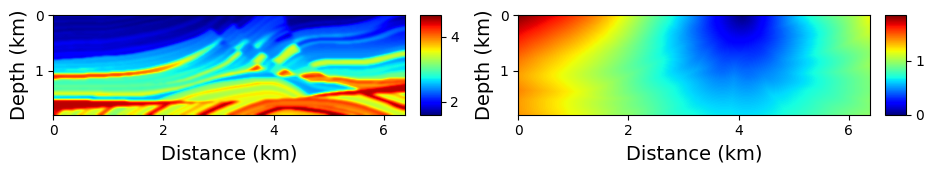

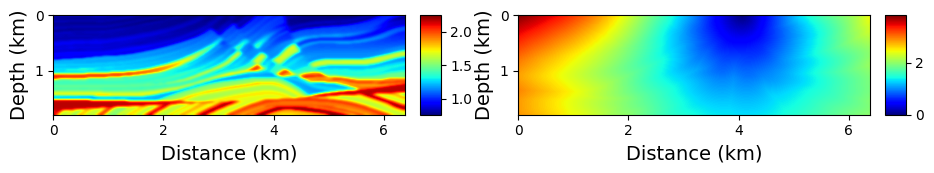

In [3]:
isou = 13
zmin = 0.;  zmax = (nz-1)*deltaz;
xmin = 0.;  xmax = (nx-1)*deltax;
plt.style.use('default')

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vp, extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(2))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(Tp_data[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(2))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)


plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(vs, extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(2))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(Ts_data[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Distance (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(2))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

"\nTp_data = Tp_data1\nTs_data = Ts_data1\nnp.save('./Tp_data_mar_vsp.npy',Tp_data)\nnp.save('./Ts_data_mar_vsp.npy',Ts_data)\n"

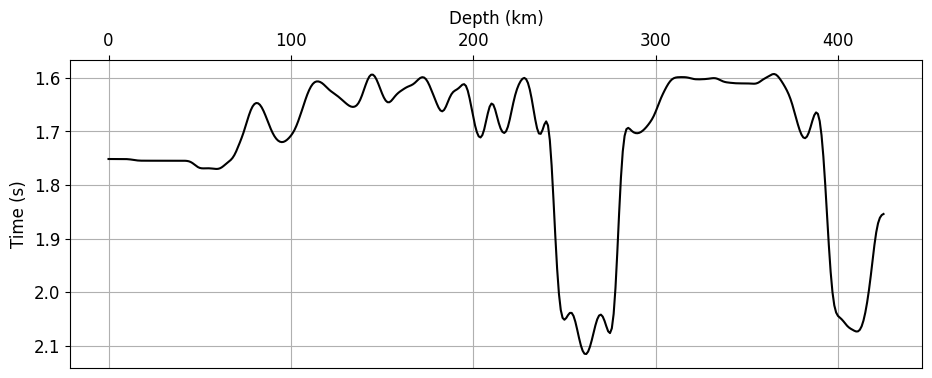

In [4]:
# print(vp[0,:])
font_size = 12
plt.style.use('default')

plt.figure(figsize=(11,4))

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

ax = plt.gca()
ax.xaxis.set_tick_params(labeltop='on')


plt.plot(vp[0,:],'k-')


ax.set_title('Depth (km)', fontsize=font_size)
plt.xticks(fontsize=font_size)

plt.ylabel('Time (s)', fontsize=font_size)
plt.yticks(fontsize=font_size)

#plt.ylim([0,1])
#plt.xlim([1.25,4.5])

plt.gca().invert_yaxis()


plt.grid()
"""
Tp_data = Tp_data1
Ts_data = Ts_data1
np.save('./Tp_data_mar_vsp.npy',Tp_data)
np.save('./Ts_data_mar_vsp.npy',Ts_data)
"""

In [5]:
"""
from eikonalfm import factored_fast_marching as ffm
from eikonalfm import distance
Tp_data1 = []
Ts_data1 = []
d = [0.025, 0.025]
order = 2
for i in range(0,21):
    ixs = [0,11+i*20]
    #ixs = [0,11+i*80]
    tp = ffm(vp, ixs, d, order)*distance(vp.shape, d, ixs, indexing='ij')
    ts = ffm(vs, ixs, d, order)*distance(vs.shape, d, ixs, indexing='ij')
    Tp_data1.append(tp)
    Ts_data1.append(ts)
Tp_data1 = np.asarray(Tp_data1)
Tp_data1 =Tp_data1.transpose((1,2,0))
Ts_data1 = np.asarray(Ts_data1)
Ts_data1 =Ts_data1.transpose((1,2,0))
"""

"\nfrom eikonalfm import factored_fast_marching as ffm\nfrom eikonalfm import distance\nTp_data1 = []\nTs_data1 = []\nd = [0.025, 0.025]\norder = 2\nfor i in range(0,21):\n    ixs = [0,11+i*20]\n    #ixs = [0,11+i*80]\n    tp = ffm(vp, ixs, d, order)*distance(vp.shape, d, ixs, indexing='ij')\n    ts = ffm(vs, ixs, d, order)*distance(vs.shape, d, ixs, indexing='ij')\n    Tp_data1.append(tp)\n    Ts_data1.append(ts)\nTp_data1 = np.asarray(Tp_data1)\nTp_data1 =Tp_data1.transpose((1,2,0))\nTs_data1 = np.asarray(Ts_data1)\nTs_data1 =Ts_data1.transpose((1,2,0))\n"

In [6]:
"""
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(Tp_data1[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(Ts_data1[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
ax = plt.gca()
im = ax.imshow(Tp_data1[:,:,isou]-Tp_data[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
plt.subplot(1,2,2)
ax = plt.gca()
im = ax.imshow(Ts_data1[:,:,isou]-Ts_data[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")


plt.xlabel('Offset (km)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('Depth (km)', fontsize=14)
plt.yticks(fontsize=10)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
"""

'\nplt.figure(figsize=(11,4))\nplt.subplot(1,2,1)\nax = plt.gca()\nim = ax.imshow(Tp_data1[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")\n\n\nplt.xlabel(\'Offset (km)\', fontsize=14)\nplt.xticks(fontsize=10)\n\nplt.ylabel(\'Depth (km)\', fontsize=14)\nplt.yticks(fontsize=10)\n\nax.xaxis.set_major_locator(plt.MultipleLocator(0.5))\n\ndivider = make_axes_locatable(ax)\ncax = divider.append_axes("right", size="6%", pad=0.15)\n\ncbar = plt.colorbar(im, cax=cax)\nplt.subplot(1,2,2)\nax = plt.gca()\nim = ax.imshow(Ts_data1[:,:,isou], extent=[xmin,xmax,zmax,zmin], aspect=1, cmap="jet")\n\n\nplt.xlabel(\'Offset (km)\', fontsize=14)\nplt.xticks(fontsize=10)\n\nplt.ylabel(\'Depth (km)\', fontsize=14)\nplt.yticks(fontsize=10)\n\nax.xaxis.set_major_locator(plt.MultipleLocator(0.5))\n\ndivider = make_axes_locatable(ax)\ncax = divider.append_axes("right", size="6%", pad=0.15)\n\ncbar = plt.colorbar(im, cax=cax)\n\nplt.figure(figsize=(11,4))\nplt.subplot(1,2,1)\nax = plt.gca()\nim = 